In [ ]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Define the date range for one year
start_date = "2022-01-01"
end_date = "2022-12-31"

# Pagination parameters
page_size = 2000
offset = 0

# Retrieve the first batch of results
results = client.get("h9gi-nx95", limit=page_size, offset=offset, where=f"crash_date between '{start_date}' and '{end_date}'")

# Convert to pandas DataFrame
df_cl = pd.DataFrame.from_records(results)

# Continue retrieving results until all rows are fetched
while len(results) == page_size:
    offset += page_size
    results = client.get("h9gi-nx95", limit=page_size, offset=offset, where=f"crash_date between '{start_date}' and '{end_date}'")
    df_temp = pd.DataFrame.from_records(results)
    df_cl = pd.concat([df_cl, df_temp], ignore_index=True)

df_cl


,crash_date,crash_time,latitude,longitude,location,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,...,vehicle_type_code2,borough,zip_code,cross_street_name,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code_4,vehicle_type_code_5
0,2022-01-01T00:00:00.000,7:33,40.771477,-73.91824,"{'latitude': '40.771477', 'longitude': '-73.91...",HOYT AVENUE NORTH,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T00:00:00.000,4:30,NaN,NaN,NaN,Southern parkway,0,0,0,0,...,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T00:00:00.000,7:57,NaN,NaN,NaN,WESTCHESTER AVENUE,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T00:00:00.000,5:17,40.74693,-73.84866,"{'latitude': '40.74693', 'longitude': '-73.848...",GRAND CENTRAL PKWY,1,0,0,0,...,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T00:00:00.000,1:30,40.819157,-73.96038,"{'latitude': '40.819157', 'longitude': '-73.96...",HENRY HUDSON PARKWAY,0,0,0,0,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103788,2022-12-31T00:00:00.000,3:15,40.705605,-73.90689,"{'latitude': '40.705605', 'longitude': '-73.90...",NaN,0,0,0,0,...,NaN,QUEENS,11385,655 WOODWARD AVENUE,NaN,NaN,NaN,NaN,NaN,NaN
103789,2022-12-31T00:00:00.000,12:20,40.657093,-73.95026,"{'latitude': '40.657093', 'longitude': '-73.95...",NOSTRAND AVENUE,0,0,0,0,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103790,2022-12-31T00:00:00.000,20:07,40.679165,-73.90751,"{'latitude': '40.679165', 'longitude': '-73.90...",NaN,1,0,1,0,...,NaN,BROOKLYN,11233,102 SOMERS STREET,NaN,NaN,NaN,NaN,NaN,NaN
103791,2022-12-31T00:00:00.000,12:39,40.66721,-73.928505,"{'latitude': '40.66721', 'longitude': '-73.928...",NaN,0,0,0,0,...,Sedan,BROOKLYN,11213,318 ROCHESTER AVENUE,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
4hr1f564mk51onbug6fun5411

1nx0015t9sgzge2sut54a5cfg5shcou2uyo6r6enttla0oxfso

In [ ]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Replace 'your_app_token_here' with your actual app token
app_token = "1nx0015t9sgzge2sut54a5cfg5shcou2uyo6r6enttla0oxfso"

# Initialize the client with your app token and a longer timeout
client = Socrata("data.cityofnewyork.us", app_token, timeout=60)

# Define the date range for one year
start_date = "2022-01-01"
end_date = "2022-01-01"

# Pagination parameters
page_size = 2000
offset = 0

# Retrieve the first batch of results
results = client.get("i4gi-tjb9", limit=page_size, offset=offset, where=f"data_as_of between '{start_date}' and '{end_date}'")

# Convert to pandas DataFrame
df_rt2 = pd.DataFrame.from_records(results)

# Continue retrieving results until all rows are fetched
while len(results) == page_size:
    offset += page_size
    results = client.get("i4gi-tjb9", limit=page_size, offset=offset, where=f"data_as_of between '{start_date}' and '{end_date}'")  # Replaced crash_date with data_as_of
    df_temp = pd.DataFrame.from_records(results)
    df_rt = pd.concat([df_rt2, df_temp], ignore_index=True)

df_rt2


HTTPError: 403 Client Error: Forbidden.
	Invalid app_token specified

In [ ]:
import pandas as pd

# Assuming df_rt is the DataFrame with the data from the previous steps
df_cl['crash_date'] = pd.to_datetime(df_cl['crash_date'])
daily_accidents = df_cl.groupby('crash_date').size().reset_index(name='accident_count')


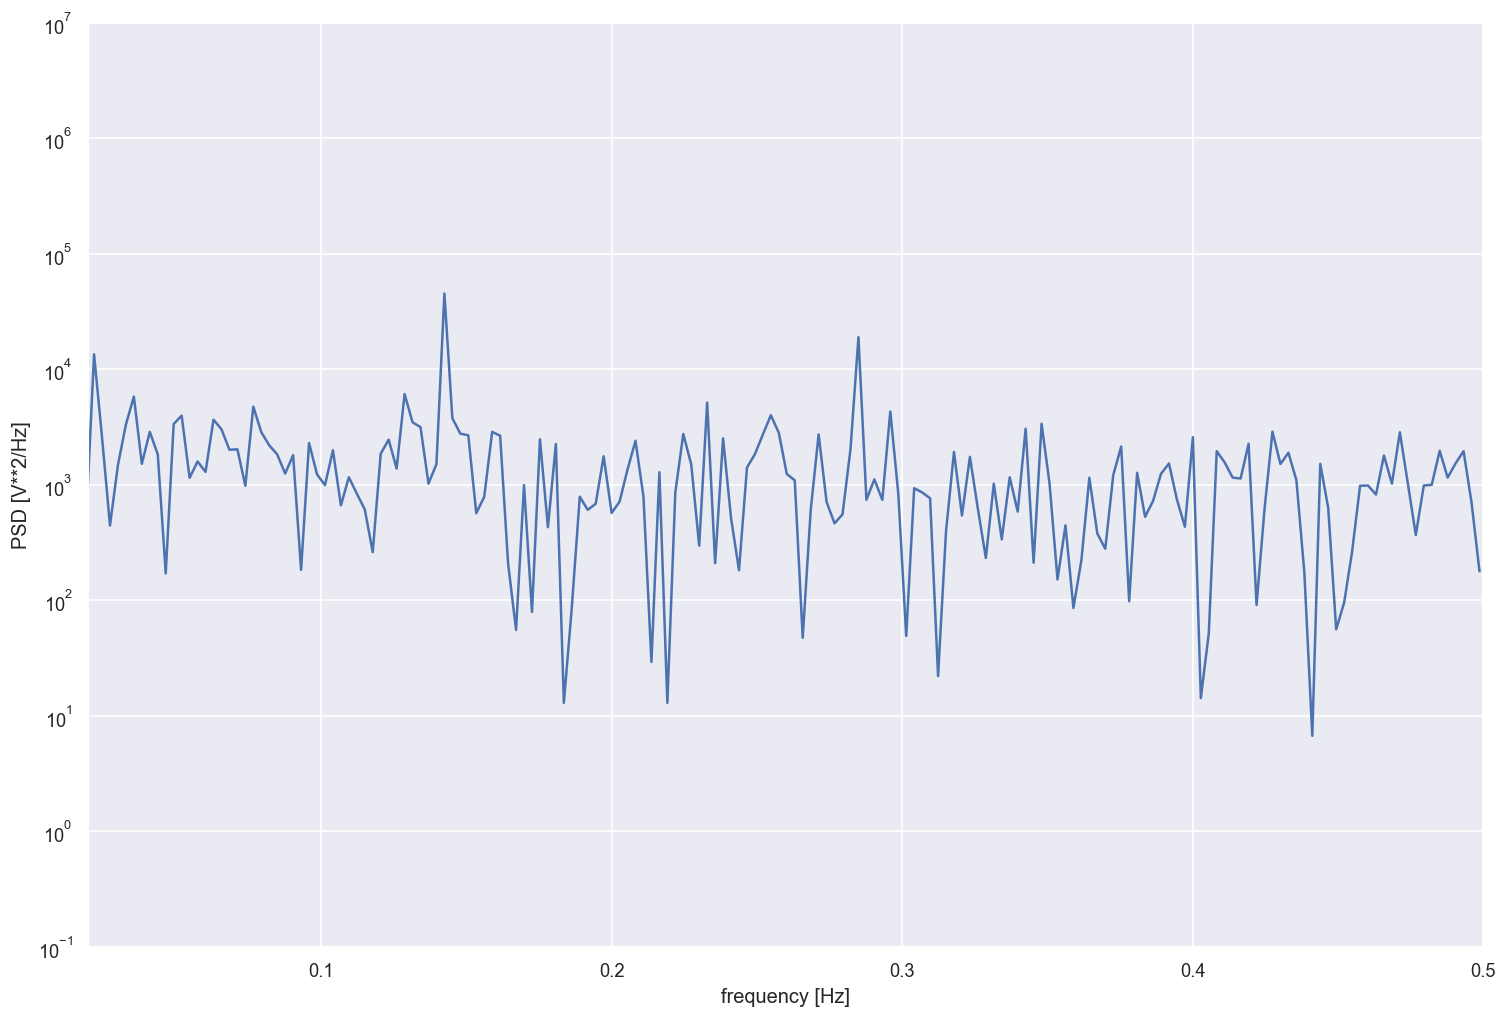

The strongest period is 7.019230769230769 days


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns


# Find a proper period using scipy.signal.periodogram and autocorrelatio
# Plot the periodogram
f, Pxx_den = signal.periodogram(daily_accidents['accident_count'])
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim(0.02,0.5) 
plt.ylim(1e-1,1e7)
Pxx_den = Pxx_den[f>0.01]; f = f[f>0.01]
plt.gcf().set_size_inches(15, 10)
plt.show()


# find the strongest period
period = 1/f[np.argmax(Pxx_den)]
print('The strongest period is {} days'.format(period))

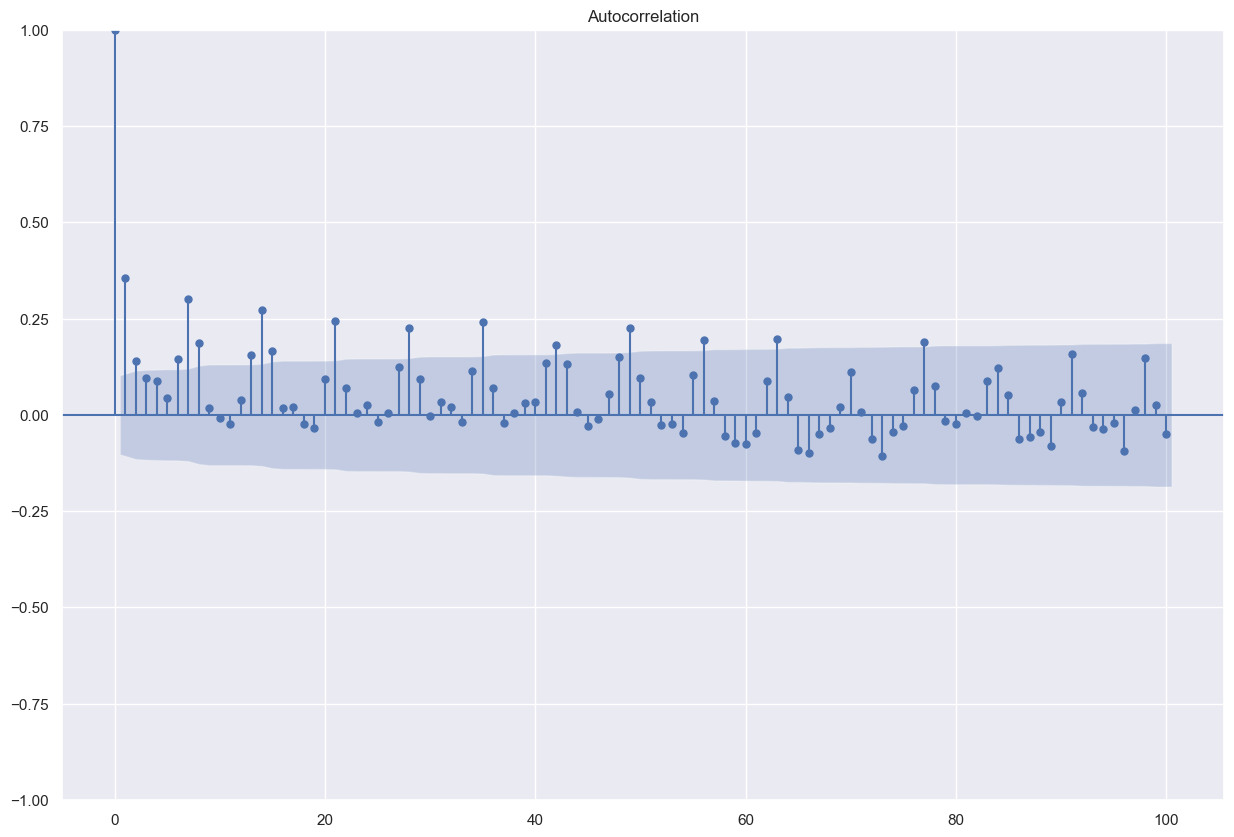

In [ ]:
plot_acf(daily_accidents['accident_count'], lags=100)
plt.gcf().set_size_inches(15, 10)
plt.show()

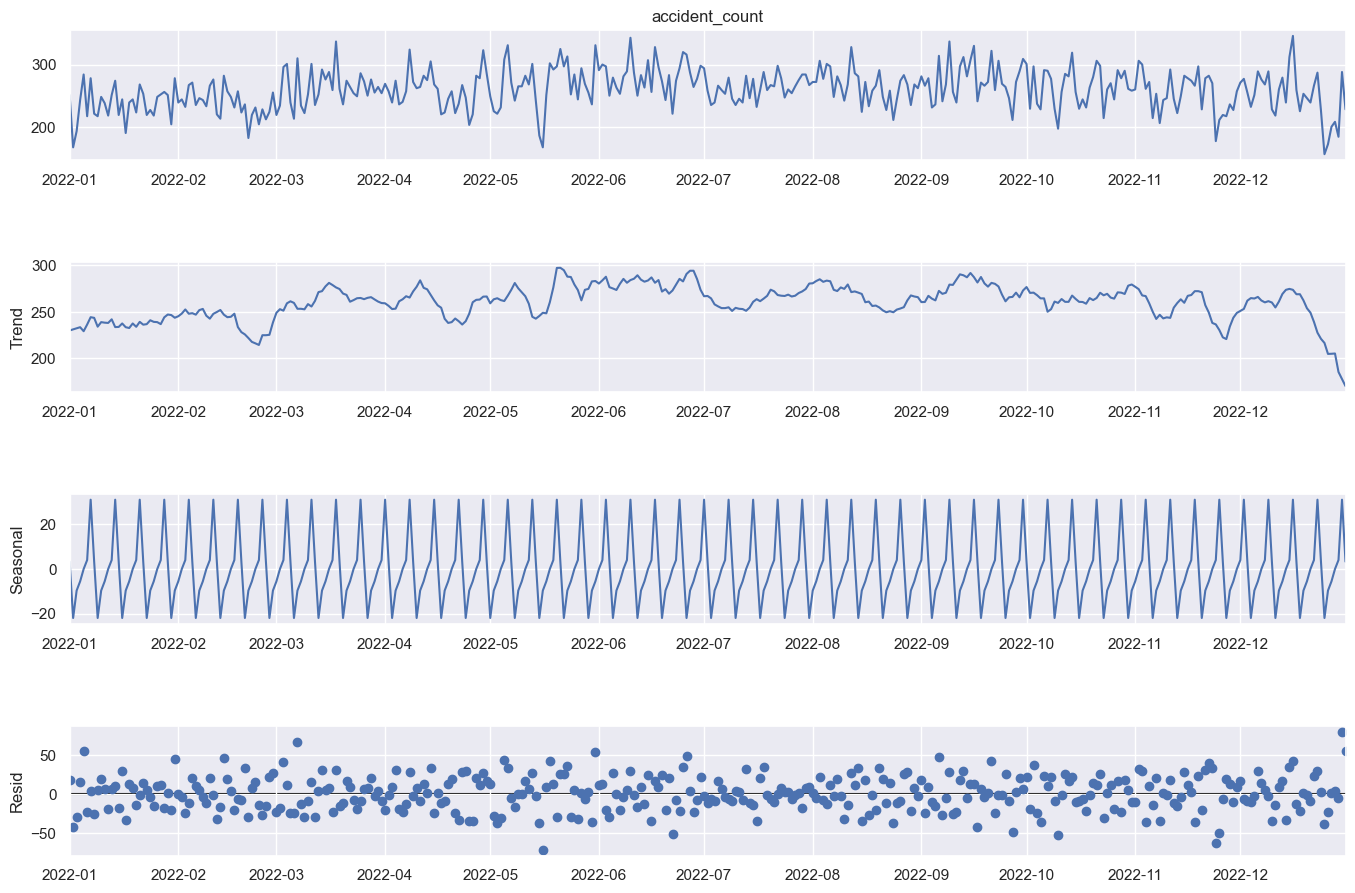

In [ ]:
# Trend, seasonality, noise decomposition (using additive model) on 2017 data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_accidents['accident_count'], model='additive', period= 7, extrapolate_trend='freq')
# make the plot legible
decomposition. plot()
plt.gcf().set_size_inches(15, 10)
plt.show()

In [ ]:
# Using adfuller test to test the stability of the aggregated dataset. If not stable, apply differencing method until the p-value from adfuller test is smaller than 0.05
from statsmodels.tsa.stattools import adfuller
result = adfuller(daily_accidents)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# 1 order differencing
result = adfuller(daily_accidents.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.546198
p-value: 0.104635
ADF Statistic: -9.686558
p-value: 0.000000


d:\Anaconda\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
d:\Anaconda\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation')

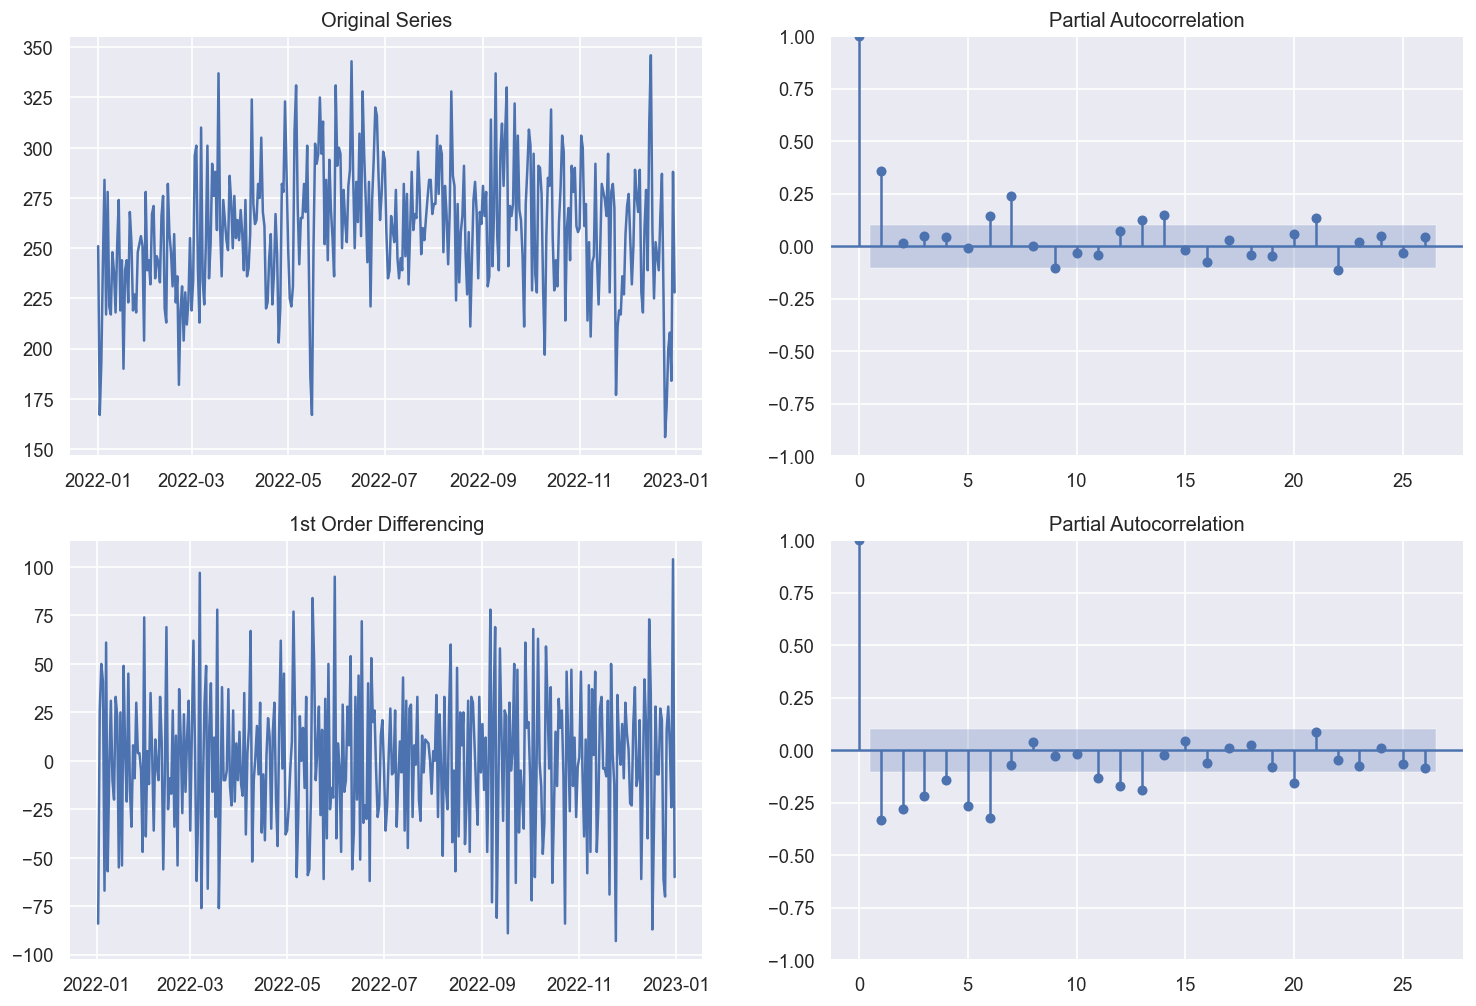

In [ ]:
# plot the series and 1st order differencing
from statsmodels.graphics.tsaplots import plot_pacf

plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(daily_accidents); ax[0, 0].set_title('Original Series')
plot_pacf(daily_accidents, ax=ax[0, 1])
ax[0, 1].set_title('Partial Autocorrelation')

# 1st Differencing
ax[1, 0].plot(daily_accidents.diff()); ax[1, 0].set_title('1st Order Differencing')
plot_pacf(daily_accidents.diff().dropna(), ax=ax[1, 1])
ax[1, 1].set_title('Partial Autocorrelation')

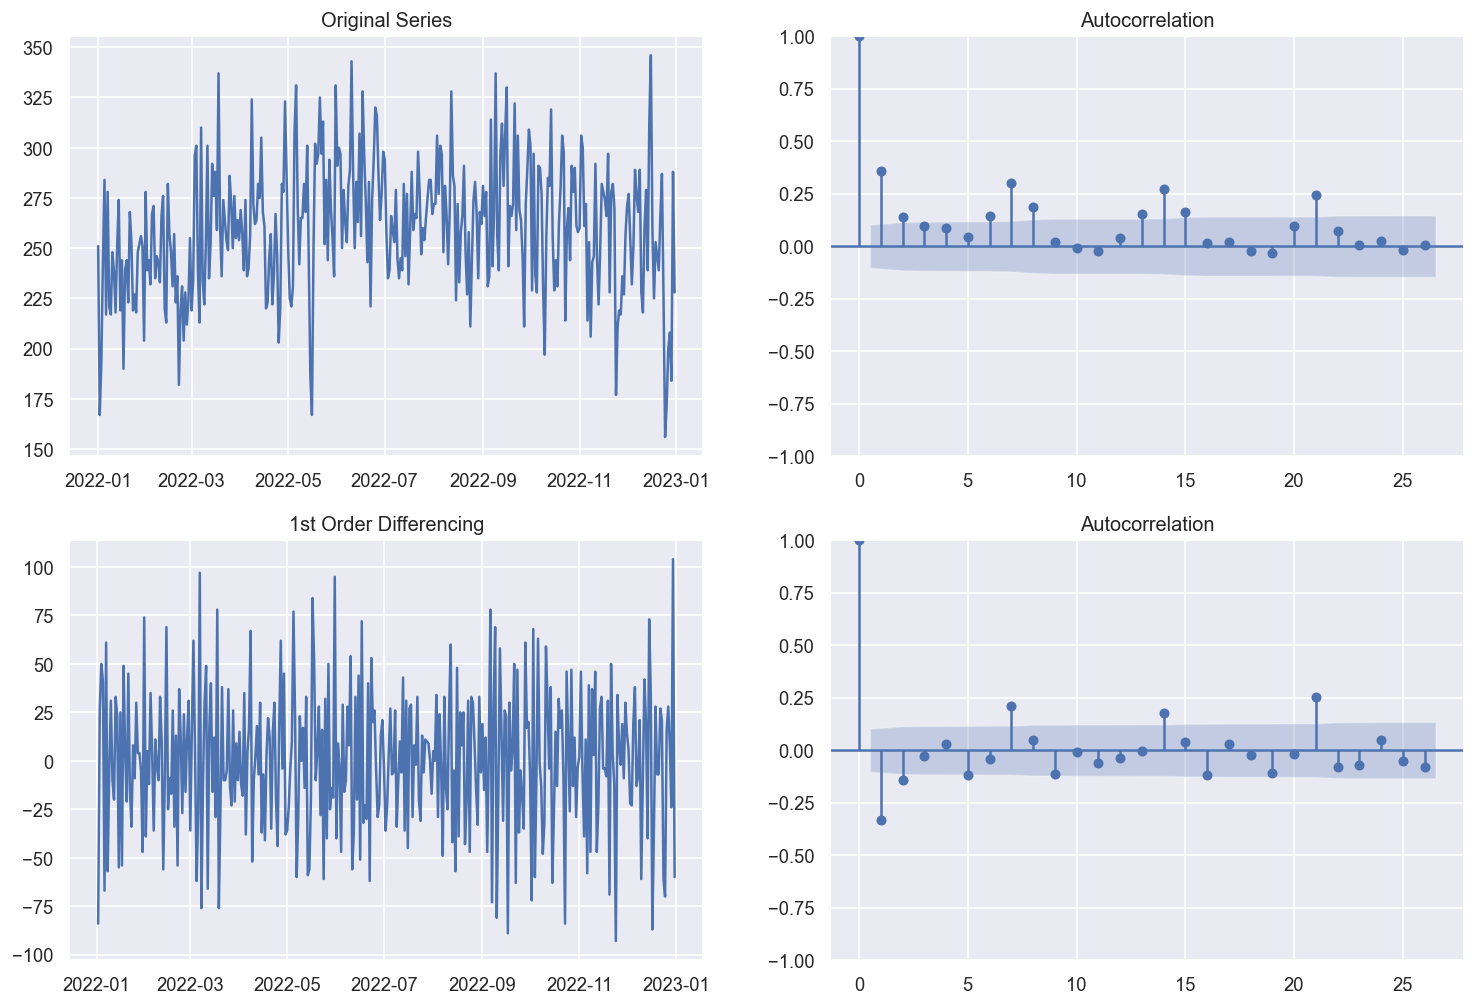

In [ ]:
# plot autocorrelation  and its series
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(daily_accidents); ax[0, 0].set_title('Original Series')
plot_acf(daily_accidents, ax=ax[0, 1])
ax[0, 1].set_title('Autocorrelation')

# 1st Differencing
ax[1, 0].plot(daily_accidents.diff()); ax[1, 0].set_title('1st Order Differencing')
plot_acf(daily_accidents.diff().dropna(), ax=ax[1, 1])
ax[1, 1].set_title('Autocorrelation')

plt.show()

d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         accident_count   No. Observations:                  365
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -1751.851
Date:                Thu, 27 Apr 2023   AIC                           3511.702
Time:                        03:08:25   BIC                           3527.291
Sample:                    01-01-2022   HQIC                          3517.898
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6785      0.052    -12.956      0.000      -0.781      -0.576
ma.L2         -0.2347      0.064     -3.641      0.000      -0.361      -0.108
ma.L3         -0.0276      0.055     -0.499      0.6

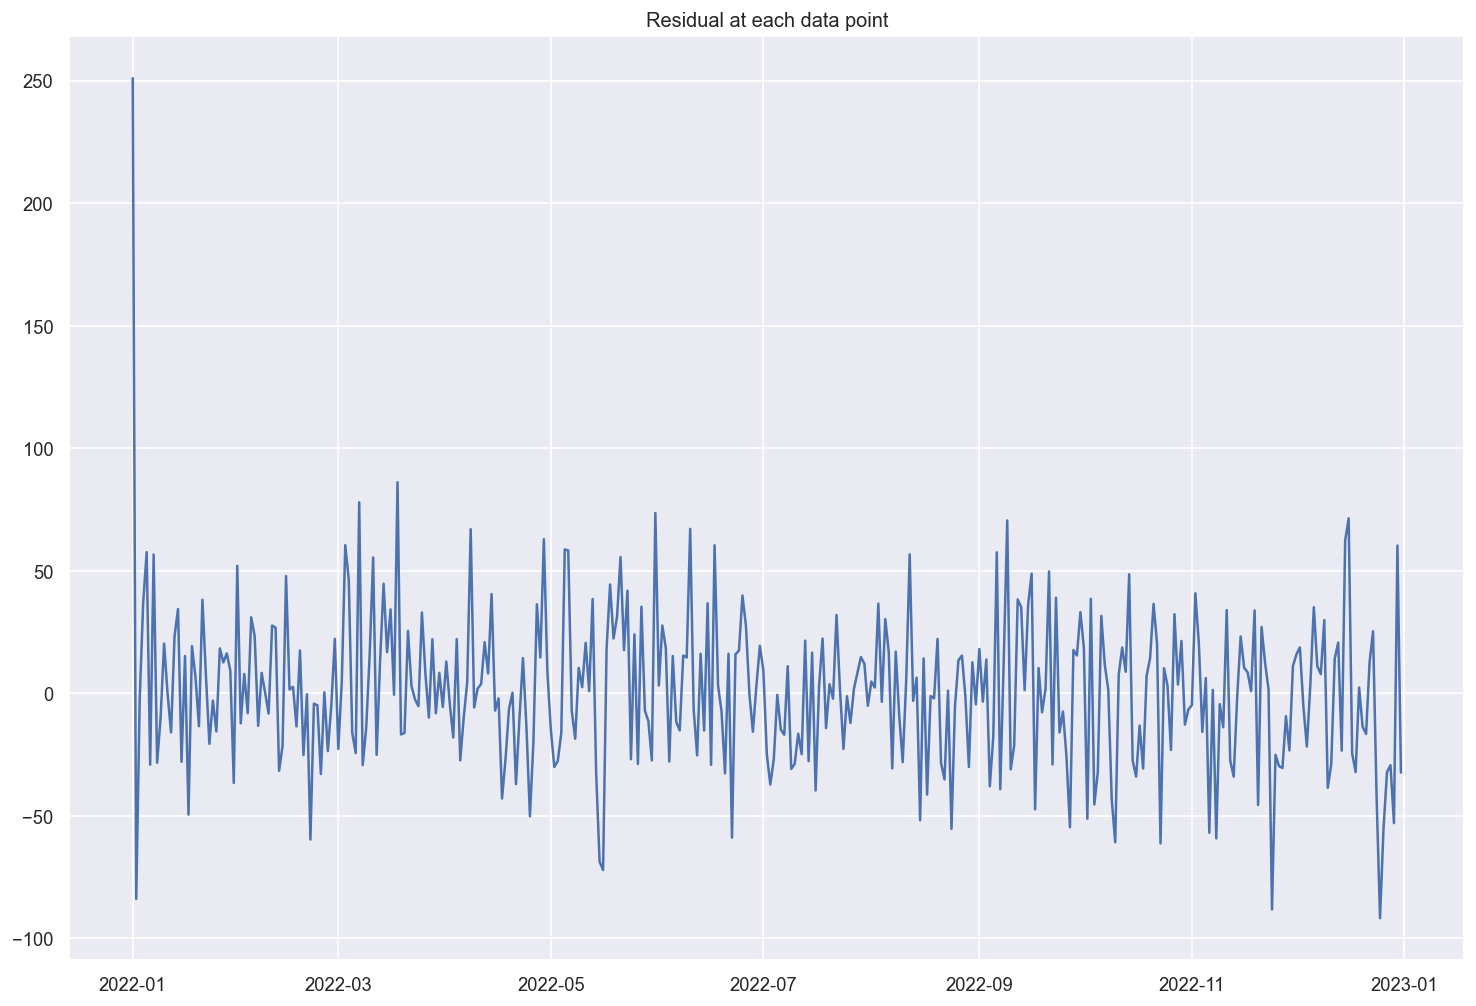

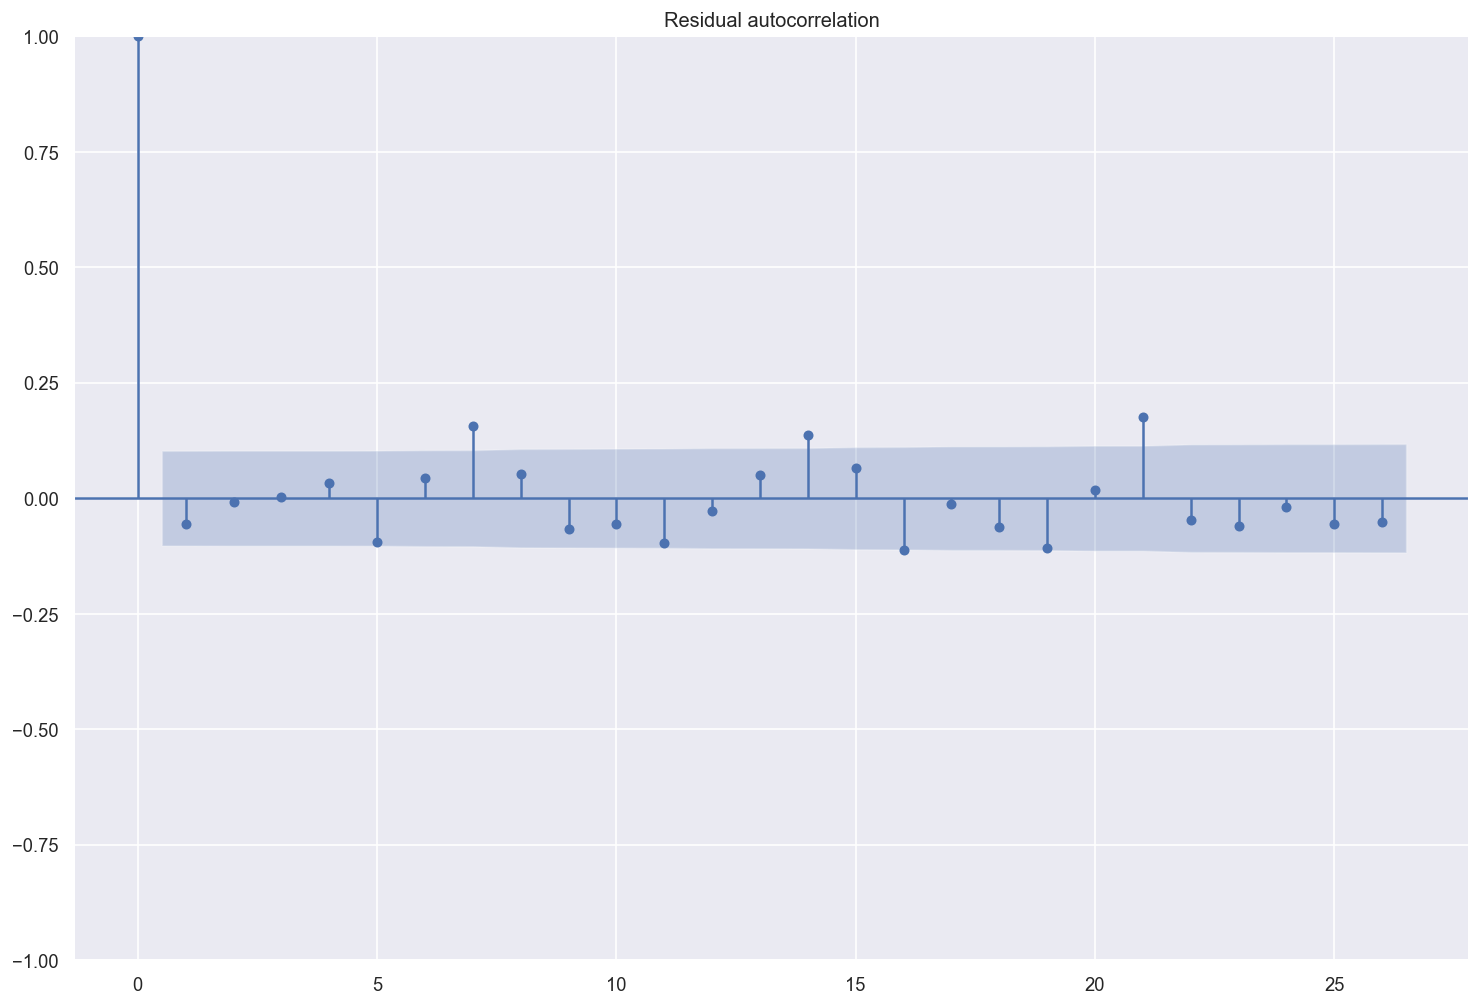

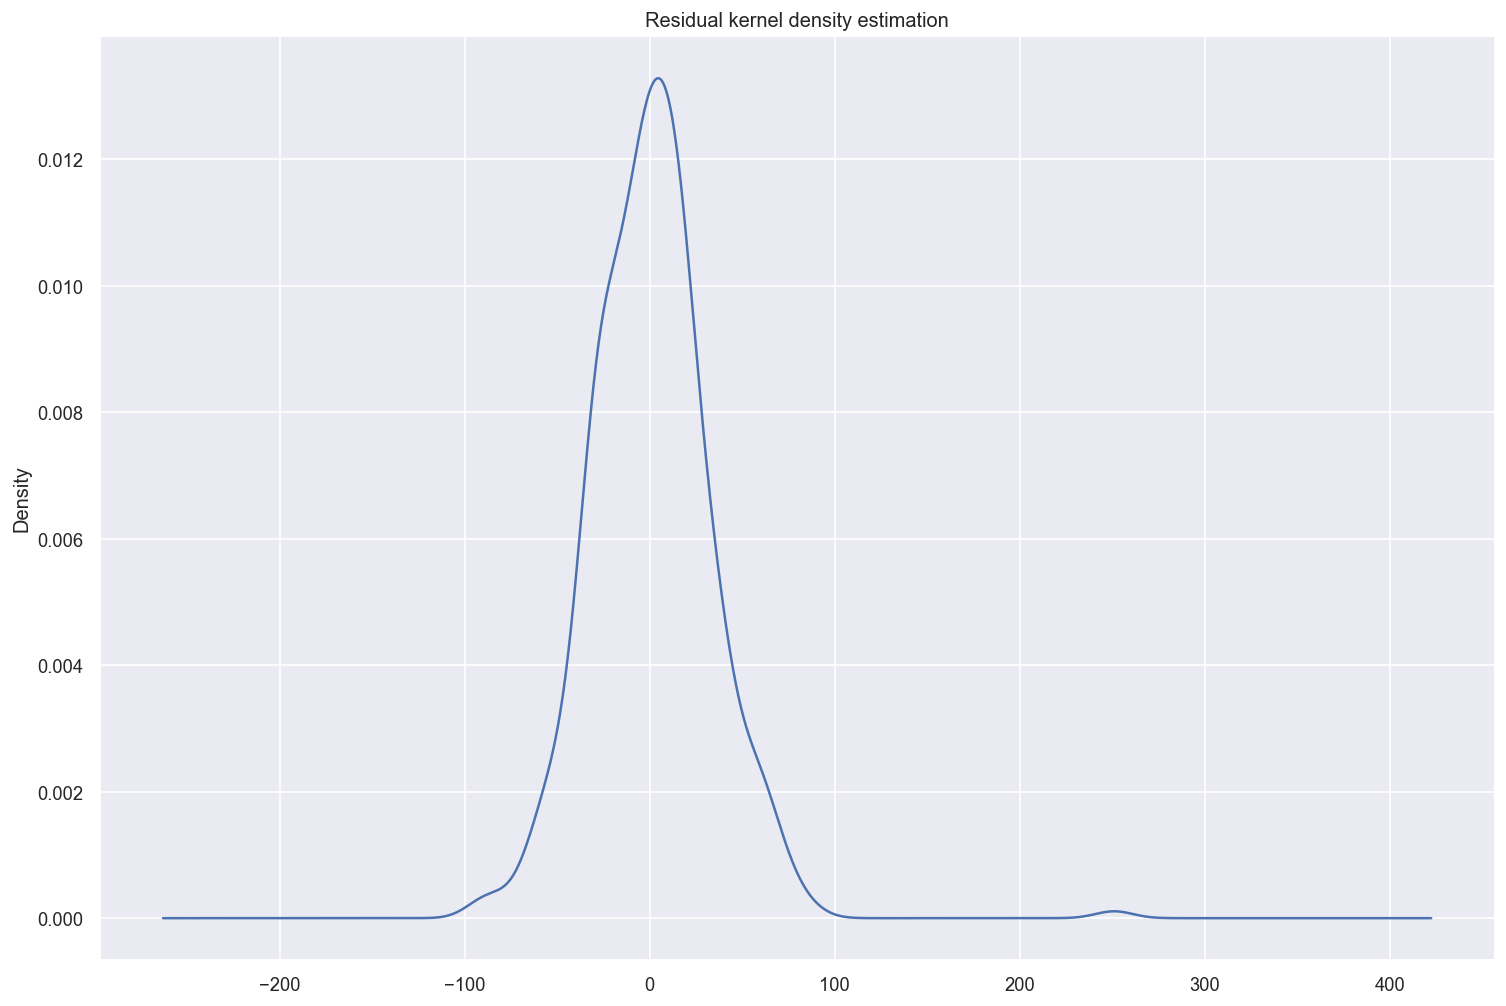

                0
count  365.000000
mean     1.170965
std     32.625712
min    -91.756358
25%    -21.153532
50%      1.265843
75%     18.334932
max    251.000000
p value is  7.922179084923944e-29
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected
Ljung–Box:
      lb_stat  lb_pvalue
1    1.141989   0.285232
2    1.170554   0.556952
3    1.171538   0.759838
4    1.581388   0.812133
5    4.971375   0.419384
6    5.678974   0.460094
7   14.918169   0.037063
8   15.907064   0.043730
9   17.631376   0.039699
10  18.829505   0.042482


In [ ]:
# Train a model on the first 700 datapoints using an ARIMA with terms 4,2 then predict on the last that 31-datapoint
import scipy
import statsmodels.api as sm
P=3
D=1
Q=0

# fit model
N=700
series = daily_accidents


#model = sm.tsa.SARIMAX(series[:N], order=(Q,D,P))
model = sm.tsa.ARIMA(series[:N], order=(Q,D,P))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


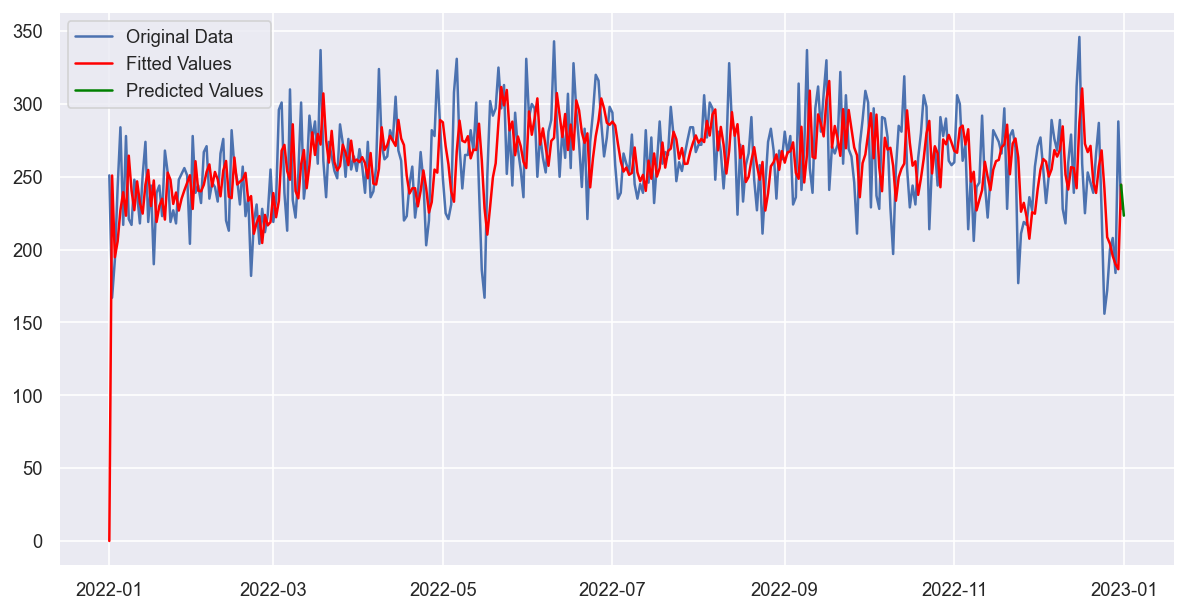

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df_cl['crash_date'] = pd.to_datetime(df_cl['crash_date'])
daily_accidents = df_cl.groupby('crash_date').size().reset_index(name='accident_count')

# Set the index of the DataFrame to the crash_date column
daily_accidents.set_index('crash_date', inplace=True)

# Create and fit the ARIMA model
model = ARIMA(daily_accidents['accident_count'], order=(3, 1, 0))
model_fit = model.fit()

# Generate predicted values for the next 7 days
forecast = model_fit.predict(start=daily_accidents.index[-1], end=daily_accidents.index[-90] + pd.Timedelta(days=90))


# Plot the original data, fitted values, and predicted values
plt.figure(figsize=(12, 6))
plt.plot(daily_accidents['accident_count'], label='Original Data')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast, color='green', label='Predicted Values')
plt.legend()
plt.show()




d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


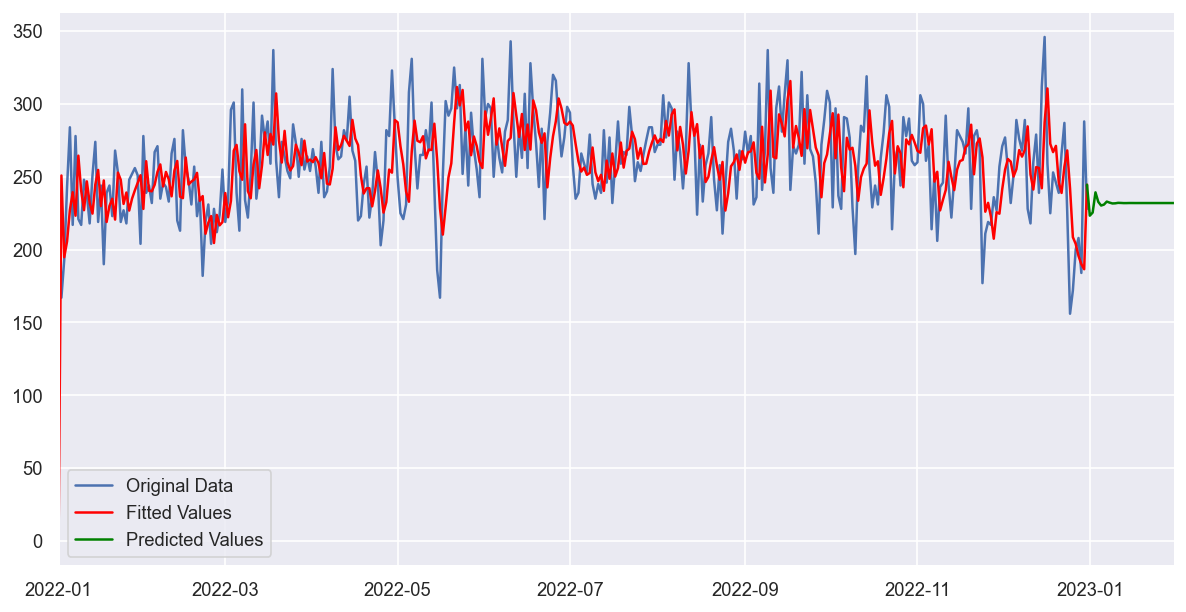

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


df_cl['crash_date'] = pd.to_datetime(df_cl['crash_date'])
daily_accidents = df_cl.groupby('crash_date').size().reset_index(name='accident_count')

# Set the index of the DataFrame to the crash_date column
daily_accidents.set_index('crash_date', inplace=True)

# Create and fit the ARIMA model
model = ARIMA(daily_accidents['accident_count'], order=(3, 1, 0))
model_fit = model.fit()

# Generate predicted values for the next 6 months
forecast_start = daily_accidents.index[-1]
forecast_end = forecast_start + pd.DateOffset(months=1)
forecast = model_fit.predict(start=forecast_start, end=forecast_end)

# Plot the original data, fitted values, and predicted values
plt.figure(figsize=(12, 6))
plt.plot(daily_accidents['accident_count'], label='Original Data')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast, color='green', label='Predicted Values')
plt.legend()
plt.xlim([daily_accidents.index[0], forecast_end])
plt.show()


d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


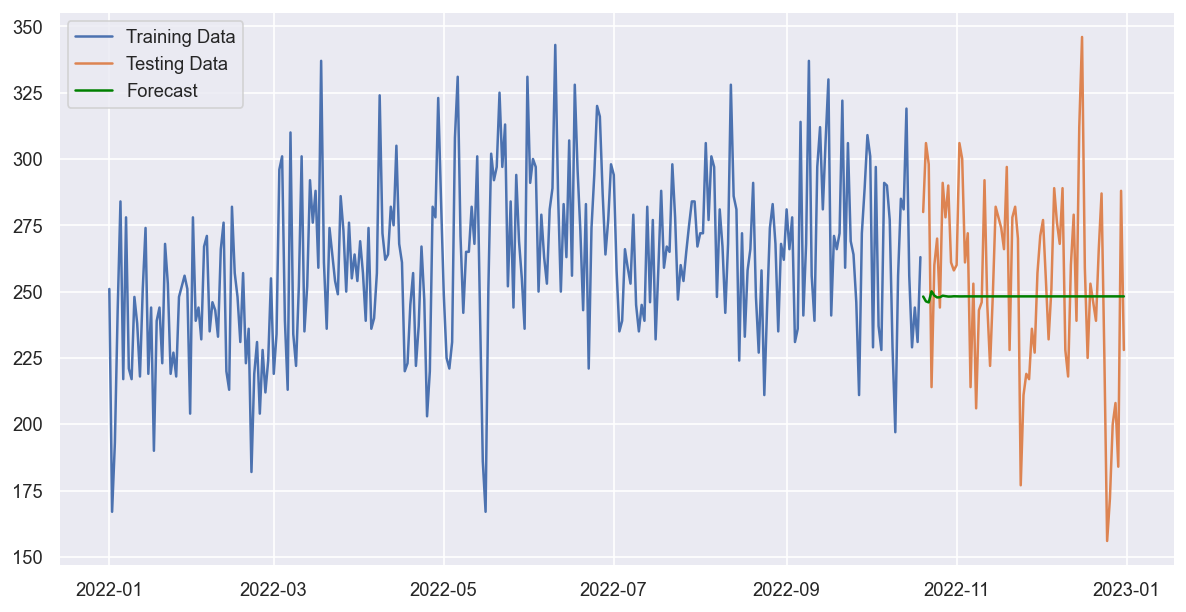

Root Mean Squared Error: 35.78
Mean Absolute Error: 29.14


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


df_cl['crash_date'] = pd.to_datetime(df_cl['crash_date'])
daily_accidents = df_cl.groupby('crash_date').size().reset_index(name='accident_count')

# Set the index of the DataFrame to the crash_date column
daily_accidents.set_index('crash_date', inplace=True)

# Split the data into training and testing sets
train, test = train_test_split(daily_accidents, test_size=0.2, shuffle=False)

# Create and fit the ARIMA model on the training set
model = ARIMA(train['accident_count'], order=(3, 1, 0))
model_fit = model.fit()

# Generate a forecast for the test set
forecast_start = test.index[0]
forecast_end = test.index[-1]
forecast = model_fit.predict(start=forecast_start, end=forecast_end)

# Plot the original data, fitted values, and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train['accident_count'], label='Training Data')
plt.plot(test['accident_count'], label='Testing Data')
plt.plot(forecast, color='green', label='Forecast')
plt.legend()
plt.show()

# Calculate the accuracy metrics
mse = mean_squared_error(test['accident_count'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['accident_count'], forecast)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
